In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import pairwise_distances

In [2]:
def load_data(path):
    x_train = np.loadtxt(path.format('x_tr'), delimiter=',', skiprows=1)
    x_test = np.loadtxt(path.format('x_tst'), delimiter=',', skiprows=1)
    y_train = np.loadtxt(path.format('y_tr'), delimiter=',', skiprows=1)
    y_test = np.loadtxt(path.format('y_tst'), delimiter=',', skiprows=1)
    
    return x_train, x_test, y_train, y_test

# Task 2
## Precalculate pairwise distance

In [3]:
class KNNPrecomputedClasifier:
    def __init__(self, x_train, y_train, x_pred):
        pair_dist = pairwise_distances(x_train, x_pred)
        self.nearest_labels = y_train[np.argsort(pair_dist, axis=0)].astype(int)
        
    def classify_for_k(self, k):
        most_common_gen = (np.bincount(col).argmax() for col in self.nearest_labels[:k].T)
        return np.fromiter(most_common_gen, float)

Try on dataset 3

In [4]:
x_train, x_test, y_train, y_test = load_data('csv/data3_{}.csv')

knn = KNNPrecomputedClasifier(x_train, y_train, x_test)

y_pred = knn.classify_for_k(10)
f1_score(y_test, y_pred, average='micro')

0.9392361111111112

# Task 1
## Tune hyperparameter k

In [54]:
max_k = 30
k_set = list(range(1, max_k + 1))

def test_params(data):
    x_train, x_test, y_train, y_test = data
    knn = KNNPrecomputedClasifier(x_train, y_train, x_test)
    
    f1_scores = []
    for k in k_set:
        y_pred = knn.classify_for_k(k)
        f1_scores.append(f1_score(y_test, y_pred, average='micro'))
        
    return np.array(f1_scores)
        
def eval_params(f1_scores):
    best_k = k_set[np.argmax(f1_scores)]
    
    plt.bar(k_set, f1_scores)
    plt.ylim(min(f1_scores) * 0.99, max(f1_scores) * 1.01)
    plt.title('Tuning k for k-NN classifier')
    plt.xlabel('k')
    plt.ylabel('F1 Score')
    plt.show()
    
    print('Best k =', best_k)
    return best_k

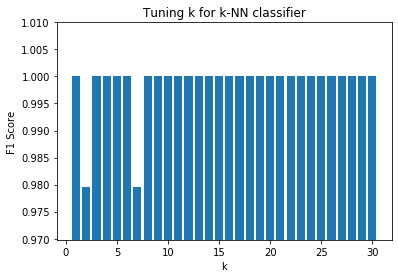

Best k = 1


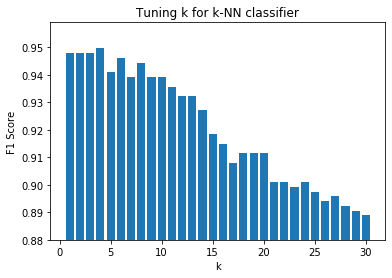

Best k = 4


4

In [55]:
# dataset data1 

data1 = load_data('csv/data_{}.csv')
f1_scores = test_params(data1)
eval_params(f1_scores)

# dataset data3

data3 = load_data('csv/data3_{}.csv')
f1_scores = test_params(data3)
eval_params(f1_scores)

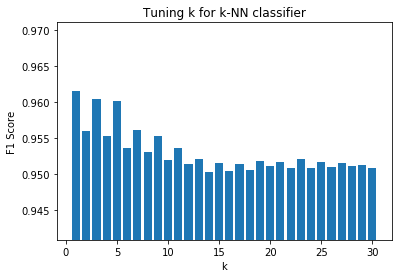

Best k = 1


1

In [56]:
# data2 is too big for the pairwise distance matrix to fit in the memory

splits = 10
x_train, x_test, y_train, y_test = load_data('csv/data2_{}.csv')

i_train = np.arange(len(x_train))
np.random.shuffle(i_train)
i_split_train = np.array_split(i_train, splits)

i_test = np.arange(len(x_test))
np.random.shuffle(i_test)
i_split_test = np.array_split(i_test, splits)

results = []
for i in range(splits):
    data = x_train[i_split_train[i]], x_test[i_split_test[i]], y_train[i_split_train[i]], y_test[i_split_test[i]]    
    results.append(test_params(data))

avg_f1_scores = sum(results) / splits
eval_params(avg_f1_scores)

In [6]:
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_test)
# f1_score(y_test, y_pred, average='micro')